# Liquidity Regimes and the Death (and Return) of Valuations:
A 35-Year Quantitative Analysis of Factor Premiums (1990–2025)

## 2. High-Level Structure of the Paper

- Story – why this matters (intro + conclusion)
- Data – what you measure (markets, factors, liquidity proxies)
- Models – how you measure (liquidity index, regimes, cross-sectional tests)
- Portfolio – what to do with it (conditional allocation

## 3. Abstract (150–200 words)


- The “valuations don’t matter in infinite money printing” meme.
- Your construction of a liquidity index and liquidity regimes.
- Key findings:
 - Valuations do matter, but **conditional on liquidity regimes**.
 - Growth dominates in **high-liquidity, negative-real-rate regimes**.
 - Value premia revive after QT / real rate normalization.

Portfolio takeaway: a simple regime-aware factor-tilt model.

## 4. Motivation

- Narrative: post-GFC QE, ZIRP, NIRP, 2010–2021 “TINA”, tech bubble 2.0.
- > “We live in a world of infinite money printing, so valuations don’t matter.”
- Research question:
  > Do valuations truly die under abundant liquidity, or do they merely become regime-dependent?

- Do valuation spreads (cheap vs expensive deciles) expand under high-liquidity regimes and compress under tight liquidity?
- How do factor premia (value, momentum, quality, low vol) vary conditional on liquidity regimes?
- Can a macro-liquidity index predict the timing of factor rotations (growth vs value, long-duration vs short-duration equities)?
- Does a regime-aware factor allocation deliver better risk-adjusted returns than a static factor mix?

## 5. Intuition

- Valuation spread: the gap between cheap and expensive stocks (e.g., top vs bottom decile by B/M).
- Liquidity regime: periods of systematically easy vs tight financial conditions driven by monetary and fiscal variables.

## 6. Literature Sketch (very short)

- **Systemic Strategy**: Factor investing: value, momentum, quality.
- **Risk Factors and Risk premia**: Liquidity
- **Regime-switching**: macro-conditional factors.

## 7. Contributions

- Build a macro liquidity index from multiple public series.
- Use HMM / Markov regimes to label high vs low liquidity states.
- Show how valuation spreads and factor returns behave across liquidity regimes.
- Propose a simple implementable regime-aware factor strategy.

## **8. Data & Variables**

---

### **8.1 Timeframe & Frequency**

* Horizon: **1990–2025**, **monthly** frequency (or weekly if feasible).
* Market: US equities (CRSP/Compustat-type universe); optional robustness on AUS/EU.

---

### **8.2 Equity & Factor Data**

* Individual stock returns $r_{i,t}$, market cap, book equity, earnings, etc.
* Characteristics $X_{i,t}$:

$$
\text{B/M},\ \text{E/P},\ \text{P/S},\ \text{size},\ \beta,\ \text{12–1 momentum},\ \text{profitability},\ \text{volatility}.
$$

* Factor returns $f_t$:

$$
\text{MKT},\ \text{HML},\ \text{SMB},\ \text{MOM},\ \text{Quality},\ \text{LowVol}.
$$

Define a **valuation spread**:

$$
V_t^{\text{spread}} = \text{Long top decile of B/M} - \text{Short bottom decile}.
$$

---

### **8.3 Macro & Liquidity Variables**

Let raw macro/liquidity variables at time $t$ be $x_{j,t}$, including:

---

#### **Monetary & Balance Sheet**

* Money growth:
  $$\Delta \log(M2_t)$$

* Fed balance sheet growth:
  $$\Delta \log(\text{BS}_t)$$

---

#### **Rates & Term Structure**

* Short rate:
  $$i_t$$

* 10Y yield:
  $$y_{10,t}$$

* Slope:
  $$\text{TS}_t = y_{10,t} - i_t$$

* Real short rate:
  $$r_t^{\text{real}} = i_t - \pi_t^e$$

---

#### **Risk & Spreads**

* Credit spread:
  $$\text{CS}_t = y_{\text{Baa},t} - y_{\text{Aaa},t}$$

* VIX level:
  $$\text{VIX}_t$$

---

#### **Plumbing Variables (if available)**

* ON RRP usage
* TGA balance

---

All variables $x_{j,t}$ will then be standardized (e.g., z-scored) and aggregated into a **single liquidity index**.



## 9. Math


### 1. Liquidity Proxies & Standardisation

$ x_t = \begin{bmatrix}
x_{1,t} \
x_{2,t} \
\vdots \
x_{J,t}
\end{bmatrix} \in \mathbb{R}^J $

$ \mu_j = \frac{1}{T} \sum_{t=1}^{T} x_{j,t} $

$ \sigma_j^2 = \frac{1}{T-1} \sum_{t=1}^{T} (x_{j,t} - \mu_j)^2 $

$ z_{j,t} = \frac{x_{j,t} - \mu_j}{\sigma_j}, \quad j = 1,\dots,J $

$ z_t = \begin{bmatrix}
z_{1,t} \
z_{2,t} \
\vdots \
z_{J,t}
\end{bmatrix} $

One may sign-flip the series so that higher $z_{j,t}$ always corresponds to easier liquidity. For example:

Use $-r^{\text{real}}_{t}$ instead of $r^{\text{real}}_{t}$.

Use $-CS_{t}$ instead of $CS_{t}$.

Use $-VIX_{t}$ instead of $VIX_{t}$.


---

### 2. Example Macro / Liquidity Variables

$ \Delta \log M2_t $

$ \Delta \log \text{BS}_t $

$ \text{TS}_t = y_{10,t} - i_t $

$ r_t^{\text{real}} = i_t - \pi_t^e $

$ \text{CS}_t = y_{Baa,t} - y_{Aaa,t} $

---

### 3. Covariance Matrix & PCA Liquidity Index

$ \Sigma = \frac{1}{T} \sum_{t=1}^{T} z_t z_t^\top $

$ \Sigma v_k = \lambda_k v_k, \quad k = 1,\dots,J $

$ \lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_J $

$ L_t = v_1^\top z_t $

(Alternative weighted index)

$ L_t = w^\top z_t $

---

### 4. HMM Liquidity Regimes

$ s_t \in {1,\dots,K} $

$ L_t \mid (s_t = k) \sim \mathcal{N}(\mu_k, \sigma_k^2), \quad k = 1,\dots,K $

$ \Pr(s_t = j \mid s_{t-1} = i) = p_{ij} $

$ P = \begin{bmatrix}
p_{11} & \cdots & p_{1K} \
\vdots & \ddots & \vdots \
p_{K1} & \cdots & p_{KK}
\end{bmatrix}, \quad \sum_{j=1}^K p_{ij} = 1 \ \forall i $

(Filtered / smoothed state classification)

$ \hat{s}_t = \arg\max_{k \in {1,\dots,K}} \Pr(s_t = k \mid L_{1:T}) $

(High- and Tight-liquidity labels)

$ k_{\text{High}} = \arg\max_k \mu_k $

$ k_{\text{Tight}} = \arg\min_k \mu_k $

(Regime indicator using probability threshold)

$ I_t^{\text{High}} = \mathbf{1}\big[ \Pr(s_t = k_{\text{High}} \mid L_{1:T}) > 0.5 \big] $

---

### 5. Multivariate Regime-Switching (Optional)

$ y_t = \begin{bmatrix}
L_t \
r_t^{\text{MKT}} \
r_t^{\text{HML}} \
\text{VIX}_t \
\vdots
\end{bmatrix} $

$ y_t \mid (s_t = k) = A_k y_{t-1} + \varepsilon_t^{(k)} $

$ \varepsilon_t^{(k)} \sim \mathcal{N}(0, \Sigma_k) $

---

### 6. Valuation Spreads & Factor Returns by Regime

(Valuation spread series, e.g. top–bottom decile)

$ V_t^{\text{spread}} $

(Regime-conditional mean valuation spread)

$ \bar{V}^{(k)} = \mathbb{E}\big[ V_t^{\text{spread}} \mid s_t = k \big] $

$ \hat{\bar{V}}^{(k)} =
\frac{\sum_{t=1}^T V_t^{\text{spread}} \cdot \mathbf{1}(\hat{s}_{t} = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Difference in spreads between regimes)

$ \hat{\bar{V}}^{(\text{High})} - \hat{\bar{V}}^{(\text{Tight})} $

(Factor return in regime ( k ))

$ r_t^{(F)} $

$ \bar{r}_F^{(k)} = \mathbb{E}\big[ r_t^{(F)} \mid s_t = k \big] $

$ \hat{\bar{r}}_F^{(k)} =
\frac{\sum_{t=1}^T r_t^{(F)} \cdot \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Regime-specific Sharpe ratio)

$ \text{SR}_F^{(k)} = \frac{\hat{\bar{r}}_F^{(k)}}{\hat{\sigma}_F^{(k)}} $

---

### 7. Predictive Regressions with Liquidity

(Continuous liquidity index)

$ r_{t+1}^{(F)} = \alpha + \beta L_t + \gamma^\top c_t + \varepsilon_{t+1} $

(Regime dummy regression)

$ r_{t+1}^{(F)} = 
\alpha + \delta_{\text{High}} I_t^{\text{High}}
+ \delta_{\text{Tight}} I_t^{\text{Tight}}
+ \delta_{\text{Neutral}} I_t^{\text{Neutral}}
+ \varepsilon_{t+1} $

---

### 8. Cross-Sectional (Fama–MacBeth) by Regime

(Cross-sectional regression at time ( t ))

$ 
r_{i,t+1} = \alpha_t
+ \lambda_{1,t} \cdot \text{Valuation}_{i,t}
+ \lambda_{2,t} \cdot \text{Size}_{i,t}
+ \lambda_{3,t} \cdot \text{Momentum}_{i,t}
+ \dots
+ \varepsilon_{i,t+1}
$

(Regime-conditional average valuation slope)

$ \bar{\lambda}_1^{(k)} = \mathbb{E}\big[\lambda_{1,t} \mid s_t = k\big] $

$ \hat{\bar{\lambda}}_1^{(k)} =
\frac{\sum_{t=1}^T \lambda_{1,t} \cdot \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

---

### 9. Regime-Aware Portfolio

(Factor return vector and regime weights)

$ f_t \in \mathbb{R}^K $

$ w^{(k)} \in \mathbb{R}^K $

$ w_t = w^{(\hat{s}_t)} $

(Portfolio return)

$ R_{p,t+1} = w_t^\top f_{t+1} $



## PCA and Sparse-PCA

Standard PCA solves:

$$
\max_{v} \; \| X v \|^{2}
\quad \text{s.t.} \quad \| v \|^{2} = 1
$$


---

### **1. PCA wants the direction with maximum variance**

PCA tries to find the direction ( $v$ ) (a unit vector) along which the projected data ( $Xv$ ) has **maximum variance**.

Variance of the projection:

$$
\text{Var}(Xv) = \frac{1}{n} |Xv|^{2}.
$$

So maximizing variance is equivalent to maximizing ( $|Xv|^{2}$ ).

---

### **2. Why the constraint ( $| v |^{2} = 1$ )?**

Without this constraint, the problem would blow up:

$$
|X(\alpha v)|^{2} = \alpha^{2} |Xv|^{2},
$$

and the maximum would be infinite by choosing ( $\alpha$ \to $\infty$ ).

So PCA forces ( $v$ ) to be a **direction**, not a magnitude → a unit vector.

---

### **3. Reformulating using the covariance matrix**

$$
|Xv|^{2} = v^\top X^\top X v.
$$

Let:

$$
S = X^\top X
$$

(the unnormalized covariance matrix).
Then PCA solves:

$$
\max_{v} ; v^\top S v
\quad\text{s.t.}\quad v^\top v = 1.
$$

This is exactly the **Rayleigh quotient**.


### Intuition 

> PCA finds the direction (unit vector) along which the data cloud has **maximum spread**.
That direction is exactly the eigenvector of the covariance matrix with the largest eigenvalue.

---

## Sparse PCA


### 1. Standard PCA

* PCA rotates the data into orthogonal directions capturing maximum variance.
* Each principal component is a **linear combination of all variables**.
* Loadings are typically **dense** (every variable has some non-zero weight).
* This makes interpretation difficult:

> “PC1 of 127 economic multicolinear variables is 127-dimensional mush of everything.”

This is why PCA is almost never used directly for economic interpretation — PCs are not sparse.

---

### 2. What is *Sparse PCA*?

**Sparse PCA = PCA where most loadings are forced to be zero.**

Mathematically:

Standard PCA solves:

$$
\max_{v} \ |Xv|^2 \quad \text{s.t. } |v|_2 = 1
$$

Sparse PCA adds an **L1 penalty** (lasso-style sparsity) or constrains the number of non-zero elements:

$$
\max_{v} \ |Xv|^2 - \lambda |v|_1
$$

or equivalently:

$$
\max_{v} \ |Xv|^2 \quad \text{s.t. } |v|_2 = 1,\ |v|_1 \leq c
$$

This forces:

* Only a **small subset** of variables to load on each component.
* Components become **interpretable** (e.g., PC1 loads on CPI, PCE, core CPI → “inflation”).

The specific implementation cited (“penalized matrix decomposition” by Witten et al. 2009) solves:

$$
\max_{u, v} \ u^\top X v \quad
\text{s.t. } |u|_2 = 1,\ |v|_2 = 1,\ |v|_1 \le c
$$

This is a general sparse factor extraction algorithm.

Intuition: 
> Sparse PCA forces components to use **only the relevant variables**, not a smear across 127 series.

---

### Key Difference

- **Standard PCA components ≈ dense, uninterpretable mixtures**
- **Sparse PCA components ≈ targeted clusters of interpretable economic variables**

---

### Why sparse PCs become interpretable as macro factors

Take FRED-MD’s 127 macro series.

If you run *standard* PCA:

* PC1 loads on 100+ variables.
* PC2 loads on another 80+.
* Interpreting them is basically hopeless.

Sparse PCA, with lasso constraints:

* allows PC1 to load only on inflation-related variables
* PC2 to load only on housing-related variables
* PC3 on credit spreads
* PC4 on yields
* PC5 on production
* etc.

This resembles the **Stock–Watson macro factor model**, but with sparsity for interpretability.

---

### **Concrete example (how sparse PCs isolate macro themes)**

Suppose sparse PCA gives:

#### **Sparse PC1 loadings:**

| Variable                | Loading |
| ----------------------- | ------- |
| CPI YoY                 | 0.71    |
| Core CPI YoY            | 0.68    |
| PCE Deflator            | 0.66    |
| PCE core                | 0.64    |
| All other 123 variables | 0       |

-> You immediately label PC1 as **"inflation factor"**.

#### **Sparse PC2 loadings:**

| Variable              | Loading |
| --------------------- | ------- |
| Housing starts        | 0.62    |
| Building permits      | 0.59    |
| New homes sold        | 0.61    |
| Mortgage applications | 0.58    |
| Everything else       | 0       |

-> PC2 = **"housing & construction cycle"**

### **Sparse PC3 loadings:**

| Variable              | Loading |
| --------------------- | ------- |
| Corporate spreads (BAA–AAA) | 0.72 |
| High yield spread | 0.69 |
| Commercial paper spread | 0.64 |
| Others | 0 |

-> PC3 = **"credit stress"**

…and so on.

### This **does not happen** with standard PCA.

Sparse PCA essentially performs **dimension reduction + variable selection** simultaneously.

---

### How sparse PCA yields *domain-specific macro factors*

Sparse PCA encourages:

* **grouping** variables that co-move strongly
* **dropping** variables unrelated to the theme
* **choosing** a small number of representative series

Given economic data naturally clusters (inflation variables co-move, housing variables co-move), sparse PCA isolates these clusters.

This is similar to economic intuition:

* inflationary variables form a single latent factor
* spreads form a financial stress factor
* yields form a term-structure factor
* employment variables form a labor factor

Sparse PCA “discovers” these clusters automatically.

---

### Why does this matter

**Sparse PCA → interpretable macro drivers → better regime classification → better factor conditioning.**

Especially when constructing a **macro liquidity index** or **financial conditions index**.

Sparse PCA gives:

| Component | Interpretation               |
| --------- | ---------------------------- |
| PC1       | Liquidity / money conditions |
| PC2       | Credit spreads               |
| PC3       | Housing activity             |
| PC4       | Yield curve / rates          |
| PC5       | Employment                   |
| PC6       | Production                   |
| PC7       | Income                       |
| PC8       | Market stress                |

These are exactly the components McCracken & Ng (2016) find in FRED-MD.

---

### TL;DR — The clean intuition

### **Standard PCA**

* Dense loadings
* Hard to interpret
* PCs are linear mush

### **Sparse PCA**

* Forces many loadings to zero
* Each PC focuses on a small cluster of variables
* Becomes interpretable as a “macro theme”
* Matches how economists think about the business cycle
* Perfect for regime classification & factor research

### Sparse PCs are explainable because:

* Economic data naturally clusters into themes
* Sparse PCA forces components to choose only the strongest cluster
* This matches known macro factors (inflation, employment, credit, etc.)


In [3]:
# !pip install pandas pandas_datareader numpy scikit-learn hmmlearn matplotlib

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt


## Config: Date Range & Series

In [95]:
start_date = "1990-01-01"
end_date   = "2025-12-31"

# --- FRED series codes ---
FRED_SERIES = {
    "M2SL":   "M2SL",      # M2 money stock (monthly, SA)
    "FED_BAL":"WALCL",     # Fed balance sheet total assets (weekly)
    "TB3M":   "TB3MS",     # 3-Month T-Bill rate (monthly)
    "DGS10":  "DGS10",     # 10-Year Treasury yield (daily -> resample monthly)
    "BAA":    "BAA",       # Moody's Baa corporate yield (monthly)
    "AAA":    "AAA",       # Moody's Aaa corporate yield (monthly)
    "CPI":    "CPIAUCSL",  # CPI index (monthly, SA)
    "GDP":    "GDP",       # Nominal GDP (quarterly, SAAR)
}

# For equity factors: Fama-French via pandas_datareader (famafrench)
FF_FACTORS_DATASET = "F-F_Research_Data_5_Factors_2x3"


## Download Macro & Liquidity Variables from FRED

In [106]:
def download_fred_series(series_dict, start, end):
    """
    Download FRED series into a single monthly DataFrame.

    Parameters
    ----------
    series_dict : dict
        Mapping logical_name -> FRED code.
    """
    dfs = []
    for name, code in series_dict.items():
        print(f"Downloading {name} ({code}) from FRED...")
        s = pdr.DataReader(code, "fred", start, end)
        s = s.rename(columns={code: name})
        dfs.append(s)

    df = pd.concat(dfs, axis=1)
    # Ensure monthly freq by end-of-month sampling
    df = df.resample("M").last()
    return df

macro_raw = download_fred_series(FRED_SERIES, start_date, end_date)
macro_raw.head()


,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
1990-01-31,3166.8,NaN,7.64,8.43,9.94,8.99,127.5,5872.701
1990-02-28,3179.2,NaN,7.74,8.51,10.14,9.22,128.0,NaN
1990-03-31,3190.1,NaN,7.90,8.65,10.21,9.37,128.6,NaN
1990-04-30,3201.6,NaN,7.77,9.04,10.30,9.46,128.9,5960.028
1990-05-31,3200.6,NaN,7.74,8.60,10.41,9.47,129.1,NaN


In [6]:
macro_raw.tail()

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI
DATE,,,,,,,
2025-07-31,22028.8,6642578.0,4.25,4.37,6.10,5.45,322.132
2025-08-31,22108.4,6603384.0,4.12,4.23,6.00,5.35,323.364
2025-09-30,22212.5,6608395.0,3.92,4.16,5.83,5.21,324.368
2025-10-31,22298.1,6587034.0,3.82,4.11,5.74,5.13,NaN
2025-11-30,NaN,6552419.0,NaN,4.00,NaN,NaN,NaN


### Transform Raw Macro Series into $J$ Liquidity Proxies $x_t$
$ x_t = \begin{bmatrix}
x_{1,t} \
x_{2,t} \
\vdots \
x_{J,t}
\end{bmatrix} \in \mathbb{R}^J $

- Money & balance sheet growth: $\Delta \log(\cdot)$
- Term spread: $y_{10} - i_{3m}$
- Real short rate: $i_{3m} - \pi_{\text{year-on-year}}$
- Credit spread: $\text{BAA} - \text{AAA}$
- etc.​


In [7]:
def build_liquidity_proxies(macro_df: pd.DataFrame) -> pd.DataFrame:
    df = macro_df.copy()

    # 1. Growth of M2 and Fed balance sheet
    df["dlog_M2"] = np.log(df["M2SL"]).diff()
    df["dlog_FED_BAL"] = np.log(df["FED_BAL"]).diff()

    # 2. Term structure: 10Y - 3M
    df["term_spread"] = df["DGS10"] - df["TB3M"]

    # 3. Year-on-year inflation (CPI yoy)
    df["infl_yoy"] = np.log(df["CPI"]).diff(12)

    # 4. Real short rate: nominal 3M - inflation
    df["real_rate"] = df["TB3M"] - (100 * df["infl_yoy"])  # TB3M in %, infl_yoy in log -> approx*100

    # 5. Credit spread: BAA - AAA
    df["credit_spread"] = df["BAA"] - df["AAA"]

    # Drop rows with NaNs from diff(12) etc.
    proxies = df[["dlog_M2", "dlog_FED_BAL", "term_spread",
                  "real_rate", "credit_spread"]].dropna()

    return proxies

liquidity_proxies = build_liquidity_proxies(macro_raw)

In [11]:
liquidity_proxies.tail()

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread
DATE,,,,,
2025-05-31,0.002610,-0.005385,0.16,1.901852,0.75
2025-06-30,0.005255,-0.001656,0.01,1.592409,0.69
2025-07-31,0.003930,-0.002950,0.12,1.554846,0.65
2025-08-31,0.003607,-0.005918,0.11,1.223147,0.65
2025-09-30,0.004698,0.000759,0.24,0.942084,0.62


### Standardize, Sign-Flip and Stack Liquidity Proxies to Get $z_{j,t}$
We want higher $z_{j,t}$ -- to mean easier liquidity.

- Growth of M2 / Fed balance sheet: already “easier = higher value” -> keeping sign
- Term spread: steeper (more positive) often associated with easier conditions -> keeping sign
- Real rate: easier liquidity when real rates are low -> flipping sign
- Credit spread: easier liquidity when spreads are tight (low) -> flipping sign

In [12]:
def standardize_and_signflip(proxies: pd.DataFrame) -> pd.DataFrame:
    """
    Standardize each column and flip signs so that higher z_{j,t}
    always corresponds to easier liquidity.
    """
    z = proxies.copy()

    # Standardize
    scaler = StandardScaler()
    z_vals = scaler.fit_transform(z)
    z = pd.DataFrame(z_vals, index=z.index, columns=z.columns)

    # Sign flips so "higher" = easier liquidity
    # dlog_M2: easier when higher -> keep
    # dlog_FED_BAL: easier when higher -> keep
    # term_spread: easier when steeper -> keep (or adjust, depending on your view)
    # real_rate: easier when more negative -> flip sign
    # credit_spread: easier when lower -> flip sign

    sign_flips = {
        "dlog_M2": +1,
        "dlog_FED_BAL": +1,
        "term_spread": +1,
        "real_rate": -1,
        "credit_spread": -1,
    }

    for col, sgn in sign_flips.items():
        z[col] = sgn * z[col]

    return z

z_t = standardize_and_signflip(liquidity_proxies)


In [13]:
z_t.tail()

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread
DATE,,,,,
2025-05-31,-0.377813,-0.314009,-0.968292,-1.362581,0.639849
2025-06-30,0.052579,-0.226920,-1.085244,-1.211510,0.786085
2025-07-31,-0.163048,-0.257126,-0.999479,-1.193172,0.883576
2025-08-31,-0.215601,-0.326453,-1.007276,-1.031235,0.883576
2025-09-30,-0.038105,-0.170518,-0.905917,-0.894019,0.956694


### Sparse PCA Liquidity Index $L_{t}$

In [81]:
pd.Series(z_t.index).describe()

count                              273
mean     2014-05-31 08:42:11.868131840
min                2003-01-31 00:00:00
25%                2008-09-30 00:00:00
50%                2014-05-31 00:00:00
75%                2020-01-31 00:00:00
max                2025-09-30 00:00:00
Name: DATE, dtype: object

In [17]:
z_t.values

array([[ 0.11561096, -0.81061174,  1.11346119,  0.322683  , -0.40817503],
       [ 0.20510346,  0.11034372,  0.8873532 ,  0.50696464, -0.23756644],
       [-0.24145055, -0.0901311 ,  1.01210244,  0.46925598, -0.11570316],
       ...,
       [-0.163048  , -0.25712611, -0.999479  , -1.1931718 ,  0.88357574],
       [-0.2156006 , -0.32645261, -1.00727583, -1.03123533,  0.88357574],
       [-0.03810504, -0.17051847, -0.90591708, -0.89401934,  0.95669371]])

In [91]:
def build_sparse_pca_liquidity_index(z_df: pd.DataFrame,
                                     alpha: float = 1.0,
                                     random_state: int = 42) -> pd.Series:
    """
    Apply SparsePCA with 1 component to z_{j,t} to obtain L_t.
    """
    spca = SparsePCA(
        n_components=1,
        alpha=alpha,
        random_state=random_state
    )

    # Fit on standardized proxies
    L_scores = spca.fit_transform(z_df.values)  # shape (T, 1)
    L = pd.Series(L_scores.flatten(), index=z_df.index, name="L")

    # Optional: enforce that L_t is positively correlated with dlog_M2
    # corr = np.corrcoef(L, z_df["dlog_FED_BAL"])[0, 1]
    # if corr < 0:
    #     L = -L

    print("SparsePCA components (loadings):")
    for coef, col in zip(spca.components_[0], z_df.columns):
        print(f"  {col}: {coef:.3f}")

    return L

L_t = build_sparse_pca_liquidity_index(z_t, alpha=0.5)


SparsePCA components (loadings):
  dlog_M2: 0.430
  dlog_FED_BAL: 0.526
  term_spread: 0.492
  real_rate: 0.389
  credit_spread: -0.381


In [25]:
L_t.head()

DATE
2003-01-31    0.447153
2003-02-28    0.861556
2003-03-31    0.567234
2003-04-30    0.979006
2003-05-31    0.696500
Freq: M, Name: L, dtype: float64

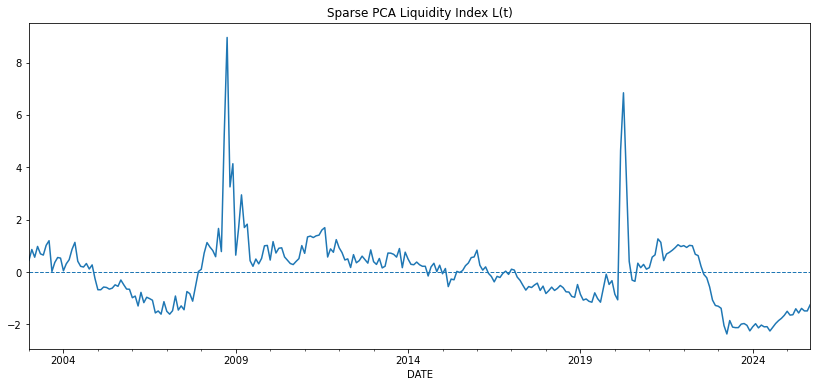

In [22]:
L_t.plot(title="Sparse PCA Liquidity Index L(t)", figsize=(14, 6))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### HMM / Markov Regime Detection on $L_t$
​Fit a Gaussian HMM on the liquidity index. 2 or 3 regimes ?

In [66]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def fit_hmm_on_liquidity(
    L: pd.Series,
    n_states: int = 3,
    covariance_type: str = "full",
    random_state: int = 42,
    standardize: bool = True
):
    """
    Fit a Gaussian HMM on L(t) and return the model and a DataFrame
    with inferred regimes and posterior probabilities.

    Parameters
    ----------
    L : pd.Series
        Liquidity index (indexed by date).
    n_states : int
        Number of hidden states (regimes).
    standardize : bool
        If True, standardize L before fitting the HMM.

    Returns
    -------
    model : GaussianHMM
    df_regime : pd.DataFrame
        Columns: L, state, p_state_k, state_label
    """

    # 1) Prepare X
    X = L.values.reshape(-1, 1)

    scaler = None
    if standardize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # 2) Fit HMM
    model = GaussianHMM(
        n_components=n_states,
        covariance_type=covariance_type,
        random_state=random_state,
        n_iter=500
    )
    model.fit(X)

    hidden_states = model.predict(X)
    post_probs = model.predict_proba(X)  # T x n_states

    # 3) Build output DataFrame on original index
    df_regime = pd.DataFrame(
        {"L": L, "state": hidden_states},
        index=L.index
    )
    for k in range(n_states):
        df_regime[f"p_state_{k}"] = post_probs[:, k]

    # 4) Use state means to order regimes
    means = pd.Series(model.means_.flatten(), index=range(n_states))

    print("HMM state means (unsorted, in fitted scale):")
    for k, m in means.items():
        print(f"  state {k}: mean L = {m:.3f}")

    # Order states from low liquidity to high liquidity
    ordering = means.sort_values().index.tolist()

    state_label_map = {}
    if n_states == 3:
        state_label_map[ordering[0]] = "Tight"
        state_label_map[ordering[1]] = "Neutral"
        state_label_map[ordering[2]] = "High"
    elif n_states == 2:
        state_label_map[ordering[0]] = "Tight"
        state_label_map[ordering[1]] = "High"
    else:
        # Generic labels if you ever use more states
        for i, s in enumerate(ordering):
            state_label_map[s] = f"Regime_{i}"

    df_regime["state_label"] = df_regime["state"].map(state_label_map)

    return model, df_regime

In [156]:
n_states = 3
model, regimes_df = fit_hmm_on_liquidity(L_t,n_states)

HMM state means (unsorted, in fitted scale):
  state 0: mean L = -0.160
  state 1: mean L = -0.106
  state 2: mean L = 2.718


In [158]:
means = pd.Series(model.means_.flatten(), index=range(n_states))
means

0   -0.159797
1   -0.105787
2    2.717670
dtype: float64

In [157]:
regimes_df.tail()

,L,state,p_state_0,p_state_1,p_state_2,state_label
DATE,,,,,,
2025-05-31,-1.561611,0,0.837436,0.162306,0.000258,Tight
2025-06-30,-1.387057,1,0.162268,0.837667,0.000066,Neutral
2025-07-31,-1.482573,0,0.837414,0.162331,0.000255,Tight
2025-08-31,-1.482572,1,0.162274,0.837635,0.000091,Neutral
2025-09-30,-1.251226,0,0.836419,0.162339,0.001242,Tight


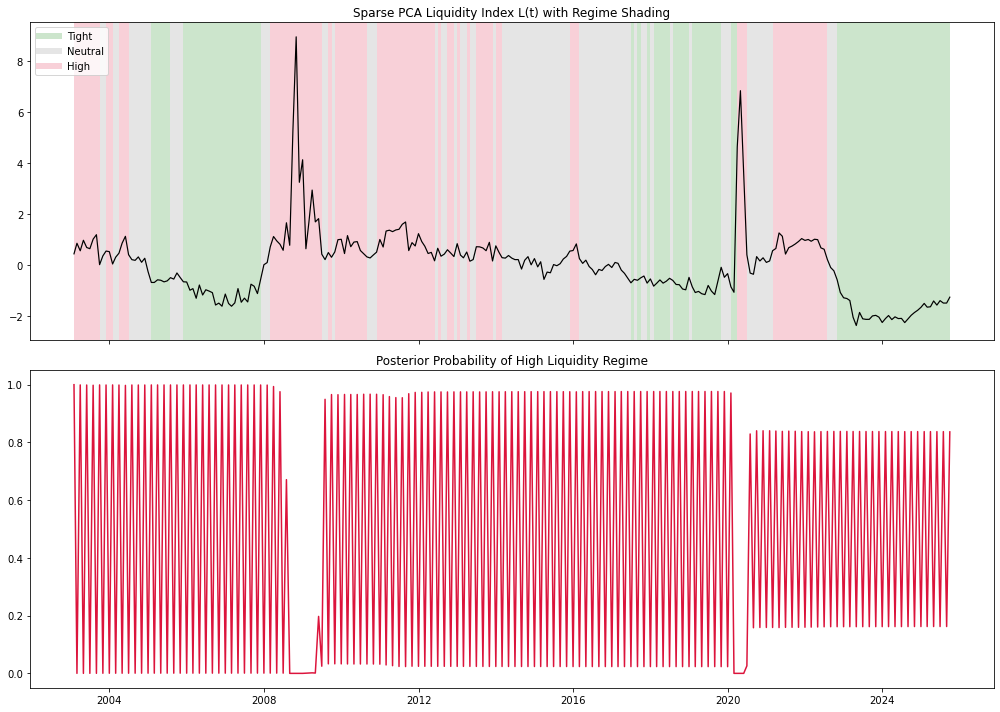

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# -----------------------------
# TOP PANEL — L(t) + shading
# -----------------------------
ax[0].plot(regimes_df.index, regimes_df["L"], color="black", lw=1.2)
ax[0].set_title("Sparse PCA Liquidity Index L(t) with Regime Shading")

# Define plain colors for each regime
regime_colors = {
    "Tight":   "green",
    "Neutral": "gray",
    "High":    "crimson",
}

shade_alpha = 0.2  # semi-opaque

for label, color in regime_colors.items():
    mask = regimes_df["state_label"] == label

    in_region = False
    start = None

    for i in range(len(mask)):
        if mask.iloc[i] and not in_region:
            in_region = True
            start = regimes_df.index[i]

        elif not mask.iloc[i] and in_region:
            in_region = False
            end = regimes_df.index[i]
            ax[0].axvspan(start, end, color=color, alpha=shade_alpha, linewidth=0)

    # If region extends to the end of the sample
    if in_region:
        ax[0].axvspan(start, regimes_df.index[-1], color=color, alpha=shade_alpha, linewidth=0)

# Legend for regimes (shaded colors)
from matplotlib.lines import Line2D
legend_patches = [
    Line2D([0], [0], color="green",   lw=6, alpha=shade_alpha, label="Tight"),
    Line2D([0], [0], color="gray",    lw=6, alpha=shade_alpha, label="Neutral"),
    Line2D([0], [0], color="crimson", lw=6, alpha=shade_alpha, label="High"),
]
ax[0].legend(handles=legend_patches, loc="upper left")

# -----------------------------
# BOTTOM PANEL — High regime probability
# -----------------------------
if "p_state_0" in regimes_df.columns:
    high_state_id = regimes_df.groupby("state_label")["state"].first()["High"]
    ax[1].plot(regimes_df.index,
               regimes_df[f"p_state_{high_state_id}"],
               color="crimson", lw=1.5)
    ax[1].set_title("Posterior Probability of High Liquidity Regime")

plt.tight_layout()
plt.show()


###  Equity Factor Data (Fama–French)

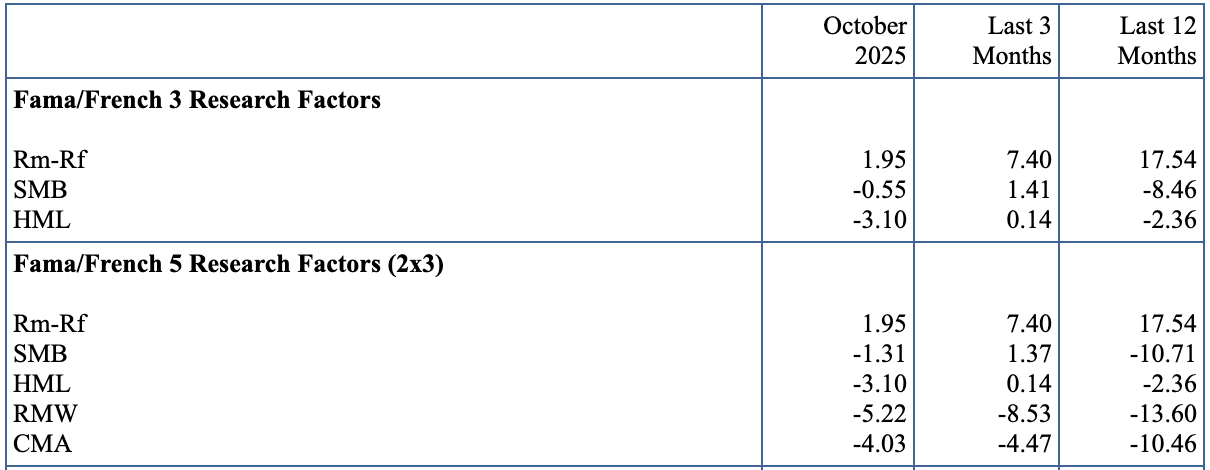

These five factors extend the original 3-factor model to better explain cross-sectional stock returns.

They are:

1. **Rm–Rf** — Market excess return
2. **SMB** — Size (Small Minus Big)
3. **HML** — Value (High Book/Market minus Low)
4. **RMW** — Profitability (Robust Minus Weak)
5. **CMA** — Investment (Conservative Minus Aggressive)

Let's break each down precisely.

---

#### **Rm – Rf: Market Excess Return**

$$
R_{m}-R_{f}
$$
The return of the **broad market** minus the **risk-free rate**.

* Positive → market went up more than cash.
* Negative → market underperformed cash/T-bills.

**In above table:**

* Last 12 months: **+17.54%** → very strong bull market year.
* Last 3 months: **+7.40%** → strong quarter.
* October 2025: **+1.95%** → moderate positive month.

---

#### **SMB: Size Factor (Small Minus Big)**

$$
\text{SMB} = R_{\text{small}} - R_{\text{big}}
$$

* Positive → small caps outperform large caps.
* Negative → large caps outperform small caps.

**In above table:**

* Last 12 months: **–10.71%** → a *massive* large-cap dominance year.
* This is consistent with mega-cap tech leadership.

---

#### **HML: Value Factor (High Minus Low Book-to-Market)**

$$
\text{HML} = R_{\text{value}} - R_{\text{growth}}
$$

* Positive → value outperforms growth.
* Negative → growth outperforms value.

**In above table:**

* Last 12 months: **–2.36%** → growth beat value.
* October 2025: **–3.10%** → especially growth-heavy month.

This aligns with liquidity-driven growth leadership.

---

#### **RMW: Profitability (Robust Minus Weak)**

$$
\text{RMW} = R_{\text{robust}} - R_{\text{weak}}
$$

Robust = high operating profitability.
Weak = low profitability.

* Positive → profitable companies outperform weak ones.
* Negative → weak/low-profit companies outperform.

**In above table:**

* Last 12 months: **–13.60%** → very unusual.
* This means **unprofitable firms outperformed** profitable ones over the year.

That usually happens in:

* early speculative bubbles
* liquidity-driven rallies
* retail-led tech/small-cap frenzies
* AI/futuristic narrative periods

---

#### **CMA: Investment Factor (Conservative Minus Aggressive)**

$$
\text{CMA} = R_{\text{conservative}} - R_{\text{aggressive}}
$$

* Conservative = firms investing slowly
* Aggressive = firms aggressively expanding assets

High investment → lower expected returns historically
(consistent with q-theory: empire-building destroys value).

* Positive → conservative firms outperform heavy spenders.
* Negative → aggressive investment firms outperform.

**In above table:**

* Last 12 months: **–10.46%**
* Last 3 months: **–4.47%**
* October 2025: **–4.03%**

Interpretation:
Aggressively investing companies — think AI, R&D, biotech, high-growth tech — massively outperformed low-investment firms.


| Factor       | Sign                                               | Interpretation |
| ------------ | -------------------------------------------------- | -------------- |
| **Rm–Rf: +** | Strong bull market                                 |                |
| **SMB: –**   | Mega-caps beat small caps massively                |                |
| **HML: –**   | Growth beat value                                  |                |
| **RMW: –**   | Low-profit firms beat profitable firms             |                |
| **CMA: –**   | Aggressive-investment firms beat conservative ones |                |

This is the **textbook signature of a liquidity-driven growth/tech momentum regime**, almost identical to:

* 1998–1999 Dotcom
* 2019–2021 QE wave
* 2023–2024 AI mega-cap boom

It means:

#### Investors preferred

* large
* growth
* unprofitable
* high-spending
* high-duration
  **tech/AI/future-theme stocks**

#### Fundamentals (profitability, valuation, conservative investment) were *penalized*

This is exactly the kind of environment where:

* Value fails
* Small cap fails
* Profitability fails
* Investment works negatively
* Growth dominates
* Mega-caps dominate


In [69]:
def download_ff_factors(start, end):
    """
    Download monthly Fama-French 5 factors (2x3) using pandas_datareader.
    """
    print("Downloading Fama-French factors (famafrench)...")
    ff_raw = pdr.DataReader(
        name=FF_FACTORS_DATASET,
        data_source="famafrench",
        start=start,
        end=end
    )[0]  # table [0] contains the data

    ff = (ff_raw
          .divide(100)  # convert from % to decimal
          .reset_index(names="date")
          .assign(date=lambda x: pd.to_datetime(x["date"].astype(str)))
          .rename(str.lower, axis="columns")
          .rename(columns={"mkt-rf": "mkt_excess"}))

    ff = ff.set_index("date")
    return ff

ff_factors = download_ff_factors(start_date, end_date)


<ipython-input-69-55f7e03990a5>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_raw = pdr.DataReader(
<ipython-input-69-55f7e03990a5>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_raw = pdr.DataReader(


In [70]:
ff_factors.tail()

,mkt_excess,smb,hml,rmw,cma,rf
date,,,,,,
2025-06-01,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034
2025-07-01,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-01,0.0185,0.0488,0.0442,-0.0068,0.0207,0.0038
2025-09-01,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-10-01,0.0195,-0.0131,-0.0310,-0.0522,-0.0403,0.0037


#### Fix Fama–French dates (shift one month backward) to align with `regimes_df`

In [83]:
# Fix Fama–French dates (shift one month backward)
ff_adj = ff_factors.copy()

# FF data comes labeled as YYYY-MM-01 meaning return for previous month.
# So shift index back to previous month-end.
ff_adj.index = (ff_adj.index.to_period("M") - 1).to_timestamp("M")

ff_adj.tail()

,mkt_excess,smb,hml,rmw,cma,rf
date,,,,,,
2025-05-31,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034
2025-06-30,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-07-31,0.0185,0.0488,0.0442,-0.0068,0.0207,0.0038
2025-08-31,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-09-30,0.0195,-0.0131,-0.0310,-0.0522,-0.0403,0.0037


#### Join regimes_df with Fama–French factors

In [84]:
# Ensure regimes are month-end
reg = regimes_df.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Join on month-end date
combined = reg.join(ff_adj, how="inner")

In [86]:
combined.tail(10)

,L,state,p_state_0,p_state_1,p_state_2,state_label,mkt_excess,smb,hml,rmw,cma,rf
2024-12-31,-1.651021,1,0.162158,0.837762,0.000079,Tight,0.0280,-0.0123,0.0163,-0.0235,-0.0324,0.0037
2025-01-31,-1.496425,0,0.837514,0.162233,0.000253,Tight,-0.0243,-0.0491,0.0491,0.0108,0.0306,0.0033
2025-02-28,-1.643180,1,0.162188,0.837738,0.000075,Tight,-0.0639,-0.0149,0.0290,0.0211,-0.0047,0.0034
2025-03-31,-1.627975,0,0.837473,0.162258,0.000269,Tight,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0035
2025-04-30,-1.400432,1,0.162220,0.837714,0.000067,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038
2025-05-31,-1.561611,0,0.837459,0.162284,0.000258,Tight,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034
2025-06-30,-1.387057,1,0.162245,0.837689,0.000066,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-07-31,-1.482573,0,0.837437,0.162308,0.000255,Tight,0.0185,0.0488,0.0442,-0.0068,0.0207,0.0038
2025-08-31,-1.482572,1,0.162251,0.837658,0.000091,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-09-30,-1.251226,0,0.836442,0.162316,0.001242,Tight,0.0195,-0.0131,-0.0310,-0.0522,-0.0403,0.0037


### Factor returns by liquidity regime

In [87]:
df2 = combined.copy()

# Regime at t (end-of-month) predicting factor returns at t+1
df2["state_label_lag1"] = df2["state_label"].shift(1)

# Drop first row (no lag)
df2 = df2.dropna(subset=["state_label_lag1", "smb", "hml", "rmw", "cma"])

# Regime-wise averages (conditional on *previous* month's liquidity)
means_by_regime = (
    df2.groupby("state_label_lag1")[["smb", "hml", "rmw", "cma"]]
       .mean()
)

std_by_regime = (
    df2.groupby("state_label_lag1")[["smb", "hml", "rmw", "cma"]]
       .std()
)

sharpe_by_regime = means_by_regime / std_by_regime

print("Mean factor returns by *lagged* regime:")
print(means_by_regime)


Mean factor returns by *lagged* regime:
                       smb       hml       rmw       cma
state_label_lag1                                        
Tight            -0.005439 -0.005360  0.000540 -0.003311
Neutral           0.003200  0.002938  0.001051 -0.000056
High              0.003327  0.001228  0.005127  0.003575


### What's going on ?

This is reverse of what you'd expect. In a tight liquidity regime, $R^{smb}$ and $R^{hml}$ should be deeply positive. You'd expect small under-valued companies to outperform big companies with premium valuation.

Let's go back to the $L_t$ and understand what's going on

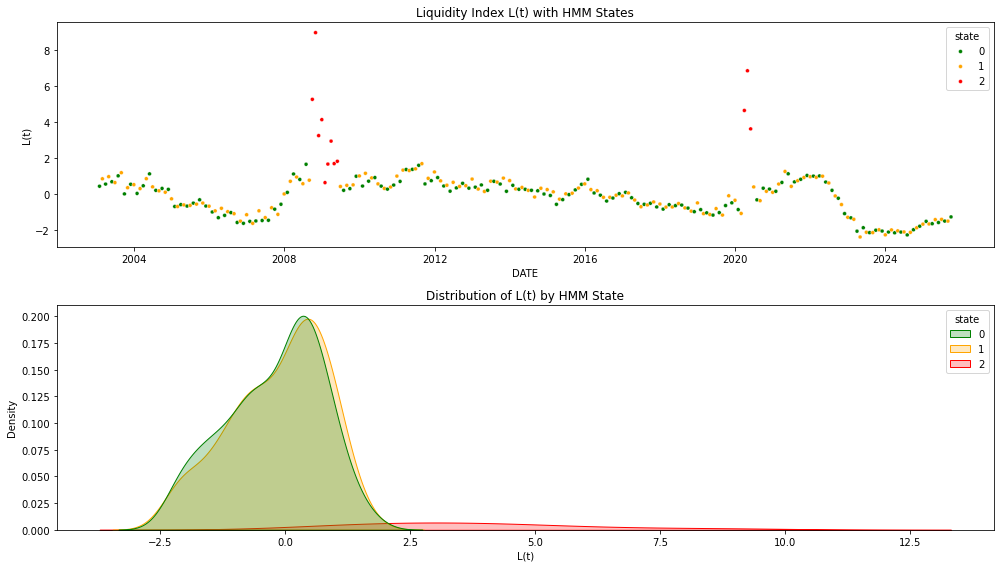

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

# 1: Time series with regimes
sns.scatterplot(
    x=L_t.index,
    y=L_t.values,
    hue=regimes_df["state"],
    palette={0: "green", 1: "orange", 2: "red"},
    ax=ax[0],
    s=15
)
ax[0].set_title("Liquidity Index L(t) with HMM States")
ax[0].set_ylabel("L(t)")

# 2: KDE (distribution) by state
sns.kdeplot(
    data=regimes_df,
    x="L",
    hue="state",
    fill=True,
    palette={0: "green", 1: "orange", 2: "red"},
    ax=ax[1]
)
ax[1].set_title("Distribution of L(t) by HMM State")
ax[1].set_xlabel("L(t)")

plt.tight_layout()
plt.show()


From the KDE (bottom panel):

- States 0 (green) and 1 (yellow) heavily overlap
- Only state 2 (red) is clearly separated — the “high liquidity spike”
- This corresponds to crisis/QE events (2008, 2020), where liquidity jumps dramatically

So the natural clustering is:

- One large cluster (normal-tight-neutral combined)
- One **rare extreme spike cluster**

Your HMM is being forced to split the unimodal bulk distribution into two states, resulting in:


```python
means = pd.Series(model.means_.flatten(), index=range(n_states))
means

0   -0.159797
1   -0.105787
2    2.717670
dtype: float64
```

I initially thought alpha=0.5 in SparsePCA might be the cause.
But the plot shows:

- L(t) has a healthy dynamic range across time (≈ −2.5 to +12)
- The high liquidity cluster is clear and **RARE**
- The rest of L(t) is genuinely one blob

If Sparse PCA was “overshrinking,” L(t) would be compressed; but it is not.

### Question is why high liquidity is rare (look at the KDE of red state 2) ?

- Is Liquidity is fundamentally spiky ?
- Why ?
- Am I defining Liquidity incorrectly ?

Fed/Treasury continuously debased currency throughout 2008-2019 period. Liquidity injection (bailing out banks during GFC/2008, ZIRP era, M2 stimulius of 2019 are visible ones). How would I capture this events as proxy of "liquidity" ?

<hr>

> Right now your $L_t$ is basically a **short-horizon “flow” liquidity shock index**.

> Whereas I'm looking for slow, structural debasement / regime of easy money (2008–2019, QE, ZIRP, etc.).

> Those are not the same object.



Because I use 1-month growth rates $\Delta \log(\cdot)$, my index reacts to spikes / changes, not the level of the monetary stock.

I need to factor in more factors to the liquidity index such as -

- **Level of money / balance sheet relative to trend** / GDP, not just monthly change
- **Prolonged ZIRP** / negative real rate period
- **Excess liquidity** over economic activity


### Two-layer liquidity: Flow vs Stock / Excess

#### Add level / excess variables

Examples (all can be pulled from FRED):

**Log level vs pre-2008 trend**

Let $m_t = \log M2_t$. Fit a linear trend on a pre-QE baseline (say 1985–2007):

$m_t \approx a + bt \quad (t \le 2007)$

Then define excess money stock:

$EM_t = m_t - (a + bt)$

After 2008, $EM_t$ becomes increasingly positive if M2 grows above its historical trend.

Similarly for the Fed Balance Sheet, let $b_t = \log(\text{FedBal}_t)$:

$EB_t = b_t - (\alpha + \beta t)$  (pre-2007 trend)

---

**Excess liquidity versus real economy**

Use real GDP series (e.g., GDPC1) and define:

$EL_t = \log M2_t - \log GDP_t$

Or measure multi-year excess growth:

$EL_t(3y) = \log M2_t - \log M2_{t-36} - (\log GDP_t - \log GDP_{t-36})$

---

**ZIRP / negative real-rate indicator**

$D_t^{ZIRP} = 1(r_t^{real} < 0)$

From 2009–2015, this should be mostly 1.

---

#### Build an augmented feature vector

Instead of only:

$x_t = \{ \Delta \log M2_t,\; \Delta \log FedBal_t,\; TS_t,\; r_t^{real},\; CS_t \}$

Let's expand to:

$x_t^{aug} = \{ 
\Delta \log M2_t,\;
\Delta \log FedBal_t,\;
TS_t,\;
r_t^{real},\;
CS_t,\;
EM_t,\;
EB_t,\;
EL_t,\;
EL_t(3y),\;
D_t^{ZIRP}
\}$

Then standardize and perform PCA / SparsePCA on this.


- **PC1** (or a combination) loading heavily on $EM$, $EB$, $EL$, $D_t^{ZIRP}$ → structural easy-money regime  
- **PC2** (or your current PC1) loading on short-horizon changes → flow / shock liquidity


In [100]:
macro_raw.tail(20)

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
2024-05-31,20989.4,7284319.0,5.25,4.51,5.95,5.25,313.140,NaN
2024-06-30,21053.0,7231163.0,5.24,4.36,5.82,5.13,313.131,NaN
2024-07-31,21084.2,7178391.0,5.20,4.09,5.84,5.12,313.566,29511.664
2024-08-31,21171.0,7123238.0,5.05,3.91,5.60,4.87,314.131,NaN
2024-09-30,21257.5,7080059.0,4.72,3.81,5.42,4.68,314.851,NaN
2024-10-31,21308.1,7013490.0,4.51,4.28,5.63,4.95,315.564,29825.182
2024-11-30,21407.9,6905140.0,4.42,4.18,5.78,5.14,316.449,NaN
2024-12-31,21424.5,6885963.0,4.27,4.58,5.80,5.20,317.603,NaN
2025-01-31,21492.4,6818186.0,4.21,4.58,6.08,5.46,319.086,30042.113


In [134]:
# 1. Start from the original GDP values only (drop NaNs)
gdp_series = macro_raw["GDP"].dropna()

# 2. Collapse to unique quarter-end values
#    - If GDP is timestamped at quarter *start* (e.g. 2025-04-01),
#      this will move it to the quarter end (2025-06-30) and give unique labels.
gdp_q = gdp_series.resample("Q").last()   # quarterly, at quarter-end (e.g. 2025-03-31, 2025-06-30, ...)

# 3. Upsample to monthly and forward-fill within the quarter
gdp_m = gdp_q.resample("M").ffill()

# 4. Assign back into macro_raw, aligning on the monthly index
macro_raw["GDP"] = gdp_m

macro_raw.tail(20)

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
2024-05-31,20989.4,7284319.0,5.25,4.51,5.95,5.25,313.140,28708.161
2024-06-30,21053.0,7231163.0,5.24,4.36,5.82,5.13,313.131,29147.044
2024-07-31,21084.2,7178391.0,5.20,4.09,5.84,5.12,313.566,29147.044
2024-08-31,21171.0,7123238.0,5.05,3.91,5.60,4.87,314.131,29147.044
2024-09-30,21257.5,7080059.0,4.72,3.81,5.42,4.68,314.851,29511.664
2024-10-31,21308.1,7013490.0,4.51,4.28,5.63,4.95,315.564,29511.664
2024-11-30,21407.9,6905140.0,4.42,4.18,5.78,5.14,316.449,29511.664
2024-12-31,21424.5,6885963.0,4.27,4.58,5.80,5.20,317.603,29825.182
2025-01-31,21492.4,6818186.0,4.21,4.58,6.08,5.46,319.086,29825.182


In [136]:
def build_liquidity_proxies_augmented(macro_df: pd.DataFrame) -> pd.DataFrame:
    df = macro_df.copy()

    # 1. Flow proxies
    df["dlog_M2"]       = np.log(df["M2SL"]).diff()
    df["dlog_FED_BAL"]  = np.log(df["FED_BAL"]).diff()
    df["term_spread"]   = df["DGS10"] - df["TB3M"]
    df["infl_yoy"]      = np.log(df["CPI"]).diff(12)
    df["real_rate"]     = df["TB3M"] - 100 * df["infl_yoy"]
    df["credit_spread"] = df["BAA"] - df["AAA"]

    # 2. Levels
    df["log_M2"]      = np.log(df["M2SL"])
    df["log_FED_BAL"] = np.log(df["FED_BAL"])

    # Use data up to 2007-12-31 to fit trends
    pre = df.loc[: "2007-12-31"].copy()

    # --- Trend for M2 ---
    pre_m2 = pre["log_M2"].dropna()
    t_m2   = np.arange(len(pre_m2))
    coefs_M2 = np.polyfit(t_m2, pre_m2.values, deg=1)

    t_full = np.arange(len(df))
    trend_M2 = np.polyval(coefs_M2, t_full)
    df["EM"] = df["log_M2"] - trend_M2

    # --- Trend for Fed balance sheet ---
    pre_fb = pre["log_FED_BAL"].dropna()
    t_fb   = np.arange(len(pre_fb))
    coefs_FB = np.polyfit(t_fb, pre_fb.values, deg=1)

    trend_FB = np.polyval(coefs_FB, t_full)
    df["EB"] = df["log_FED_BAL"] - trend_FB

    # 3. Excess liquidity vs GDP over 3y
    df["log_GDP"] = np.log(df["GDP"])
    df["EL_3y"] = (df["log_M2"] - df["log_M2"].shift(36)) - \
                  (df["log_GDP"] - df["log_GDP"].shift(36))

    # 4. ZIRP dummy
    df["ZIRP_dummy"] = (df["real_rate"] < 0).astype(int)

    # 5. Build augmented proxy matrix
    cols_aug = [
        "dlog_M2", "dlog_FED_BAL", "term_spread", "real_rate", "credit_spread",
        "EM", "EB", "EL_3y", "ZIRP_dummy"
    ]

    return df[cols_aug].dropna()


liquidity_proxies_aug = build_liquidity_proxies_augmented(macro_raw)

In [137]:
liquidity_proxies_aug.tail(10)

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread,EM,EB,EL_3y,ZIRP_dummy
DATE,,,,,,,,,
2024-09-30,0.004077,-0.006080,-0.91,2.316574,0.74,0.204864,0.811903,-0.194283,0
2024-10-31,0.002378,-0.009447,-0.23,1.971101,0.68,0.202921,0.798940,-0.199645,0
2024-11-30,0.004673,-0.015569,-0.24,1.742012,0.64,0.203273,0.779855,-0.203197,0
2024-12-31,0.000775,-0.002781,0.31,1.438113,0.60,0.199728,0.773558,-0.186129,0
2025-01-31,0.003164,-0.009892,0.37,1.254690,0.62,0.198572,0.760151,-0.188367,0
2025-02-28,0.003354,-0.007668,0.02,1.444603,0.60,0.197605,0.748966,-0.189520,0
2025-03-31,0.003338,-0.003828,0.03,1.822893,0.64,0.196623,0.741623,-0.177663,0
2025-04-30,0.006165,-0.004606,-0.04,1.903069,0.73,0.198467,0.733501,-0.172818,0
2025-05-31,0.002610,-0.005385,0.16,1.901852,0.75,0.196757,0.724600,-0.167478,0


In [138]:
z1_t = standardize_and_signflip(liquidity_proxies_aug)
z1_t.tail(10)

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread,EM,EB,EL_3y,ZIRP_dummy
DATE,,,,,,,,,
2024-09-30,-0.139814,-0.331324,-1.812889,-1.577541,0.673692,0.888682,0.786734,-2.353880,-1.527525
2024-10-31,-0.414988,-0.409551,-1.282837,-1.408779,0.819794,0.868074,0.764262,-2.404333,-1.527525
2024-11-30,-0.043456,-0.551814,-1.290631,-1.296871,0.917195,0.871811,0.731177,-2.437752,-1.527525
2024-12-31,-0.674370,-0.254667,-0.861913,-1.148418,1.014596,0.834206,0.720261,-2.277159,-1.527525
2025-01-31,-0.287635,-0.419885,-0.815143,-1.058817,0.965896,0.821943,0.697018,-2.298214,-1.527525
2025-02-28,-0.256970,-0.368230,-1.087964,-1.151588,1.014596,0.811689,0.677630,-2.309059,-1.527525
2025-03-31,-0.259533,-0.278983,-1.080169,-1.336381,0.917195,0.801267,0.664900,-2.197496,-1.527525
2025-04-30,0.198084,-0.297077,-1.134734,-1.375546,0.698042,0.820833,0.650819,-2.151913,-1.527525
2025-05-31,-0.377318,-0.315174,-0.978836,-1.374952,0.649342,0.802693,0.635389,-2.101665,-1.527525


In [139]:
L1_t = build_sparse_pca_liquidity_index(z1_t, alpha=0.5)
L1_t.tail(10)

SparsePCA components (loadings):
  dlog_M2: -0.132
  dlog_FED_BAL: -0.159
  term_spread: -0.389
  real_rate: -0.515
  credit_spread: 0.046
  EM: -0.114
  EB: -0.134
  EL_3y: -0.518
  ZIRP_dummy: -0.490


DATE
2024-09-30    3.347080
2024-10-31    3.143188
2024-11-30    3.088484
2024-12-31    2.811365
2025-01-31    2.736110
2025-02-28    2.887801
2025-03-31    2.906425
2025-04-30    2.856634
2025-05-31    2.850481
2025-06-30    2.674924
Freq: M, Name: L, dtype: float64

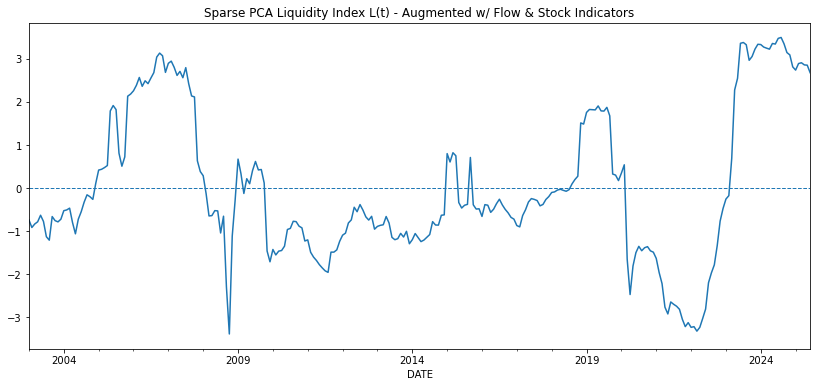

In [195]:
L1_t.plot(title="Sparse PCA Liquidity Index L(t) - Augmented w/ Flow & Stock Indicators", figsize=(14, 6))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

In [161]:
model, regimes_aug_df = fit_hmm_on_liquidity(L1_t,n_states=2)

HMM state means (unsorted, in fitted scale):
  state 0: mean L = -0.484
  state 1: mean L = 1.536


In [162]:
regime_aug_df.tail(10)

,L,state,p_state_0,p_state_1,state_label
DATE,,,,,
2024-09-30,3.347080,1,7.082075e-08,1.000000,High
2024-10-31,3.143188,1,1.226701e-07,1.000000,High
2024-11-30,3.088484,1,1.441515e-07,1.000000,High
2024-12-31,2.811365,1,3.564580e-07,1.000000,High
2025-01-31,2.736110,1,4.676727e-07,1.000000,High
2025-02-28,2.887801,1,2.736315e-07,1.000000,High
2025-03-31,2.906425,1,2.569518e-07,1.000000,High
2025-04-30,2.856634,1,3.043360e-07,1.000000,High
2025-05-31,2.850481,1,3.200660e-07,1.000000,High


In [163]:
# Ensure regimes are month-end
reg = regimes_aug_df.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Join on month-end date
combined_aug = reg.join(ff_adj, how="inner")

In [164]:
combined_aug.tail(10)

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf
2024-09-30,3.347080,1,7.082075e-08,1.000000,High,-0.0100,-0.0089,0.0086,-0.0148,0.0098,0.0039
2024-10-31,3.143188,1,1.226701e-07,1.000000,High,0.0649,0.0459,0.0015,-0.0231,-0.0205,0.0040
2024-11-30,3.088484,1,1.441515e-07,1.000000,High,-0.0315,-0.0383,-0.0300,0.0189,-0.0121,0.0037
2024-12-31,2.811365,1,3.564580e-07,1.000000,High,0.0280,-0.0123,0.0163,-0.0235,-0.0324,0.0037
2025-01-31,2.736110,1,4.676727e-07,1.000000,High,-0.0243,-0.0491,0.0491,0.0108,0.0306,0.0033
2025-02-28,2.887801,1,2.736315e-07,1.000000,High,-0.0639,-0.0149,0.0290,0.0211,-0.0047,0.0034
2025-03-31,2.906425,1,2.569518e-07,1.000000,High,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0035
2025-04-30,2.856634,1,3.043360e-07,1.000000,High,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038
2025-05-31,2.850481,1,3.200660e-07,1.000000,High,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034
2025-06-30,2.674924,1,2.893931e-05,0.999971,High,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034


In [165]:
df2 = combined_aug.copy()

# Regime at t (end-of-month) predicting factor returns at t+1
df2["state_label_lag1"] = df2["state_label"].shift(1)

# Drop first row (no lag)
df2 = df2.dropna(subset=["state_label_lag1", "smb", "hml", "rmw", "cma"])

# Regime-wise averages (conditional on *previous* month's liquidity)
means_by_regime = (
    df2.groupby("state_label_lag1")[["smb", "hml", "rmw", "cma"]]
       .mean()
)

std_by_regime = (
    df2.groupby("state_label_lag1")[["smb", "hml", "rmw", "cma"]]
       .std()
)

sharpe_by_regime = means_by_regime / std_by_regime

print("Mean factor returns by Liquidity Regime:")
print(means_by_regime)


Mean factor returns by Liquidity Regime:
                       smb       hml       rmw       cma
state_label_lag1                                        
High             -0.004519 -0.001700  0.001564 -0.003006
Tight             0.001896  0.000038  0.002920  0.001302


## Yes !!

| Factor | High Liquidity | Tight Liquidity | Interpretation |
|--------|----------------|-----------------|----------------|
| **SMB** | Negative | Positive | Small caps thrive when liquidity tightens |
| **HML** | Negative | Slightly positive | Value improves in tight regimes |
| **RMW** | Positive | More positive | Profitability is the strongest cross-regime performer |
| **CMA** | Negative | Positive | Conservative investment becomes favored when liquidity tightens |



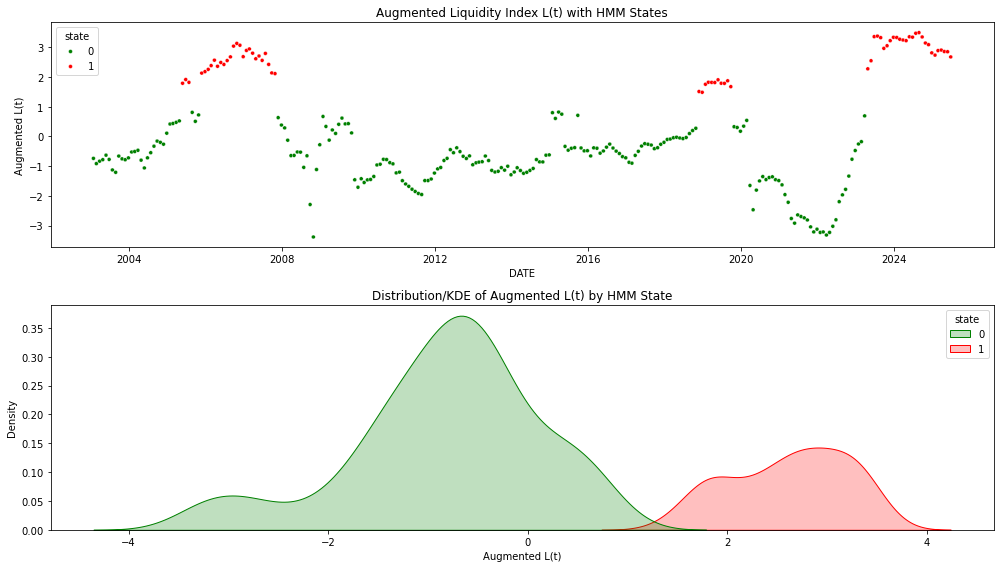

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

# 1: Time series with regimes
sns.scatterplot(
    x=L1_t.index,
    y=L1_t.values,
    hue=regimes_aug_df["state"],
    palette={0: "green", 1: "red"},
    ax=ax[0],
    s=15
)
ax[0].set_title("Augmented Liquidity Index L(t) with HMM States")
ax[0].set_ylabel("Augmented L(t)")

# 2: KDE (distribution) by state
sns.kdeplot(
    data=regimes_aug_df,
    x="L",
    hue="state",
    fill=True,
    palette={0: "green", 1: "red"},
    ax=ax[1]
)
ax[1].set_title("Distribution/KDE of Augmented L(t) by HMM State")
ax[1].set_xlabel("Augmented L(t)")

plt.tight_layout()
plt.show()


In KDE of augmented liquidity index $L_t^{aug}$, clusters are clearly separated, unlike last one

### S&P 500 monthly prices

### CAPE Data from https://shillerdata.com/

In [173]:
import pandas as pd
import numpy as np

def parse_yyyy_mm_to_date(s: str):
    """
    Convert 'YYYY.MM' to a proper datetime.
    Handles the special case where October appears as YYYY.1 instead of YYYY.10.
    """
    s = str(s).strip()
    parts = s.split(".")
    if len(parts) != 2:
        raise ValueError(f"Unexpected date format: {s}")
    
    year = int(parts[0])
    mm = parts[1]

    # Fix: "1" should be "10" (October)
    if mm == "1":
        month = 10
    else:
        month = int(mm)

    return pd.Timestamp(year=year, month=month, day=1)

# --- Load CAPE CSV ---
sp500_cape_raw = pd.read_csv("data/sp500-cape-1990-2025.csv")

# Clean + parse
sp500_cape_raw["date"] = sp500_cape_raw["Date"].apply(parse_yyyy_mm_to_date)

sp500_cape_raw = (
    sp500_cape_raw[["date", "SP500", "CAPE"]]
    .set_index("date")
    .sort_index()
)

# Convert to month-end aligned CAPE series
sp500_cape_m = sp500_cape_raw.resample("M").last()
sp500_cape_m.rename(columns={"CAPE": "cape", "SP500": "sp500"}, inplace=True)

sp500_cape_m.tail()


,sp500,cape
date,,
2025-08-31,6408.95,37.85
2025-09-30,6584.02,38.58
2025-10-31,6735.69,39.21
2025-11-30,6740.89,39.12
2025-12-31,6812.63,39.42


### From valuation levels into a spread series

**Long-Term Average/Median**: 
The S&P 500's historical long-term average CAPE ratio is around 16-18, with a median value of approximately 16.04 (since 1881). This provides a central benchmark.

**High Valuation (Expensive)**: 
A CAPE ratio that is notably higher than the historical average (e.g., above 25 or 30) is considered indicative of a highly valued or overvalued market. Historically, values exceeding 30 have only occurred during major market peaks like the 1929 crash, the dot-com bubble in the late 1990s (peaking over 44), and the post-pandemic period around 2021. Such high readings have typically been followed by periods of lower-than-average, or even negative, long-term returns.

**Low Valuation (Cheap)**: A CAPE ratio well below the historical average (e.g., below 15 or 10) suggests an undervalued or cheap market. Historically, such levels have been associated with minimal downside risk and higher average long-term returns.

Could have calculated

```python
V_spread = (x - baseline) / baseline # baseline = 16
```

Problem is, if the whole world "structurally" shifted (e.g. post-1990 lower inflation), "16" stops being meaningful.

We are instead measuring,

$$
V_t = \frac{CAPE_t - \mathrm{median}(CAPE)}{\mathrm{IQR}(CAPE)}
$$


In [186]:
def build_valuation_spread_baseline(
    val_df: pd.DataFrame,
    metric: str = "cape",
    baseline: float = None,
    scale: bool = True,
) -> pd.Series:
    x = val_df[metric].astype(float)

    if baseline is None:
        # robust long-run baseline
        median = x.median()
        iqr = x.quantile(0.75) - x.quantile(0.25)
        baseline = median
        denom = iqr if scale and iqr > 0 else baseline
    else:
        denom = baseline if scale else 1.0

    diff = x - baseline          

    V_spread = diff / denom if scale else diff
    V_spread.name = "V_spread"
    return V_spread

# Example: baseline at 16.04 (long-run median)
V_spread_t = build_valuation_spread_baseline(
    sp500_cape_m,
    metric="cape",
    baseline=None,
    scale=True,   # or False if you prefer "CAPE points below baseline"
)

V_spread_t.tail()

date
2025-08-31    1.259380
2025-09-30    1.338771
2025-10-31    1.407287
2025-11-30    1.397499
2025-12-31    1.430125
Freq: M, Name: V_spread, dtype: float64

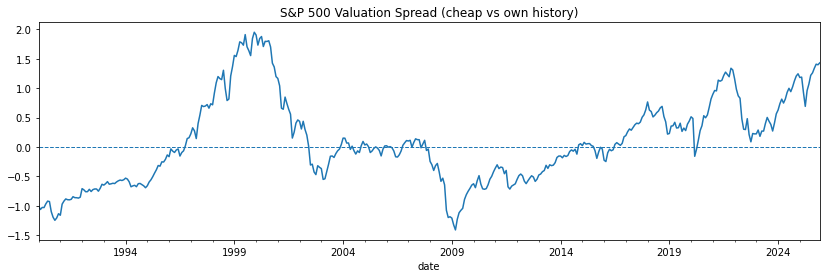

In [188]:
V_spread_t.plot(figsize=(14, 4), title="S&P 500 Valuation Spread (cheap vs own history)")
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### Combine Liquidity Regime with Valuation Spread

In [190]:
regimes_df.tail()

,L,state,p_state_0,p_state_1,p_state_2,state_label
DATE,,,,,,
2025-05-31,-1.561611,0,0.837436,0.162306,0.000258,Tight
2025-06-30,-1.387057,1,0.162268,0.837667,0.000066,Neutral
2025-07-31,-1.482573,0,0.837414,0.162331,0.000255,Tight
2025-08-31,-1.482572,1,0.162274,0.837635,0.000091,Neutral
2025-09-30,-1.251226,0,0.836419,0.162339,0.001242,Tight


In [196]:
combined_aug.tail()

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf
2025-02-28,2.887801,1,2.736315e-07,1.000000,High,-0.0639,-0.0149,0.0290,0.0211,-0.0047,0.0034
2025-03-31,2.906425,1,2.569518e-07,1.000000,High,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0035
2025-04-30,2.856634,1,3.043360e-07,1.000000,High,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038
2025-05-31,2.850481,1,3.200660e-07,1.000000,High,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034
2025-06-30,2.674924,1,2.893931e-05,0.999971,High,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034


In [198]:
# regimes_df: index is month-end
reg = combined_aug.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Align valuation spread to month-end, then join
V_spread_m = V_spread_t.resample("M").last()

combined = (
    reg
    .join(V_spread_m.to_frame(), how="inner")
)

combined.tail()

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf,V_spread
2025-02-28,2.887801,1,2.736315e-07,1.000000,High,-0.0639,-0.0149,0.0290,0.0211,-0.0047,0.0034,1.187602
2025-03-31,2.906425,1,2.569518e-07,1.000000,High,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0035,0.925503
2025-04-30,2.856634,1,3.043360e-07,1.000000,High,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038,0.690593
2025-05-31,2.850481,1,3.200660e-07,1.000000,High,0.0486,-0.0002,-0.0160,-0.0320,0.0145,0.0034,0.958129
2025-06-30,2.674924,1,2.893931e-05,0.999971,High,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034,1.070147


### Regime-conditional valuation spreads

### Valuation Spreads & Factor Returns by Regime Math

(Valuation spread series, e.g. top–bottom decile)

$ V_t^{\text{spread}} $

(Regime-conditional mean valuation spread)

$ \bar{V}^{(k)} = \mathbb{E}\big[ V_t^{\text{spread}} \mid s_t = k \big] $

$ \hat{\bar{V}}^{(k)} =
\frac{\sum_{t=1}^T V_t^{\text{spread}} \cdot \mathbf{1}(\hat{s}_{t} = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Difference in spreads between regimes)

$ \hat{\bar{V}}^{(\text{High})} - \hat{\bar{V}}^{(\text{Tight})} $

(Factor return in regime ( k ))

$ r_t^{(F)} $

$ \bar{r}_F^{(k)} = \mathbb{E}\big[ r_t^{(F)} \mid s_t = k \big] $

$ \hat{\bar{r}}_F^{(k)} =
\frac{\sum_{t=1}^T r_t^{(F)} \cdot \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Regime-specific Sharpe ratio)

$ \text{SR}_F^{(k)} = \frac{\hat{\bar{r}}_F^{(k)}}{\hat{\sigma}_F^{(k)}} $

In [199]:
# Regime-conditional mean valuation spread:  V̄^(k)
val_means_by_regime = (
    combined
    .groupby("state_label")["V_spread"]
    .mean()
)

val_stds_by_regime = (
    combined
    .groupby("state_label")["V_spread"]
    .std()
)

print("Regime-conditional mean valuation spread:")
print(val_means_by_regime)

print("\nRegime-conditional valuation z-score std dev:")
print(val_stds_by_regime)

# Difference in spreads between regimes:  V̂^(High) − V̂^(Tight)
if {"High", "Tight"}.issubset(val_means_by_regime.index):
    spread_diff = (
        val_means_by_regime["High"] - val_means_by_regime["Tight"]
    )
    print("\nDifference in spreads High − Tight:")
    print(spread_diff)


Regime-conditional mean valuation spread:
state_label
High     0.380274
Tight   -0.049269
Name: V_spread, dtype: float64

Regime-conditional valuation z-score std dev:
state_label
High     0.406851
Tight    0.551632
Name: V_spread, dtype: float64

Difference in spreads High − Tight:
0.42954211798360936


### Insigts

- Tight liquidity = cheaper markets (value regime),
- High liquidity = expensive markets (growth regime).

> Markets are ~0.43σ more expensive in High liquidity regimes than Tight liquidity regimes.

### Plot L(t), S&P 500, and V_spread_t together with regime shading,

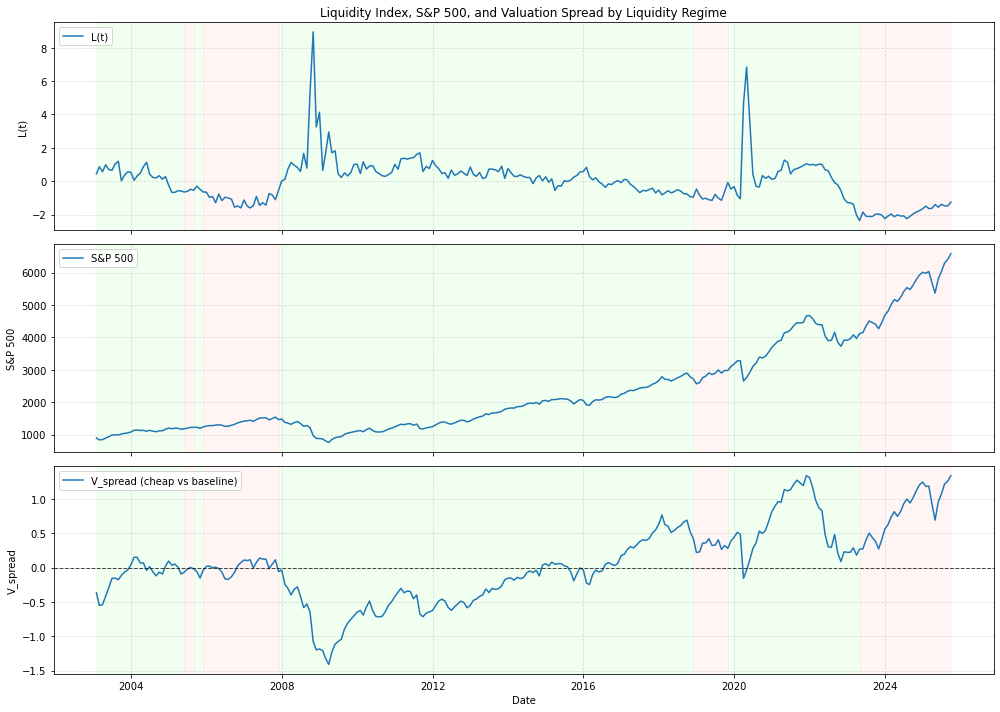

In [202]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# Assume you already have:
#   L_t              : pd.Series (liquidity index), monthly, name "L"
#   sp500_cape_m     : DataFrame with column "sp500" (S&P 500)
#   V_spread_t       : pd.Series ("V_spread"), monthly valuation cheapness
#   regimes_df       : DataFrame with column "state_label"
# -------------------------------------------------------------------

# 1) Build a common monthly dataframe
df_plot = pd.DataFrame(index=L_t.index.union(sp500_cape_m.index).union(V_spread_t.index))

df_plot["L"]         = L_t.reindex(df_plot.index)
df_plot["spx_price"] = sp500_cape_m["sp500"].reindex(df_plot.index)
df_plot["V_spread"]  = V_spread_t.reindex(df_plot.index)

# Attach regimes (forward-fill in case of any slight index mismatch)
reg_states = combined["state_label"].reindex(df_plot.index).ffill()
df_plot["state_label"] = reg_states

# Optional: drop rows before we have all three series
df_plot = df_plot.dropna(subset=["L", "spx_price", "V_spread", "state_label"])

# 2) Helper: find contiguous regime segments for shading
def get_regime_segments(states: pd.Series):
    """
    Given a Series of regime labels indexed by date,
    return list of (start_date, end_date, label) segments
    where the label is constant.
    """
    segments = []
    prev_label = None
    start_date = None

    for dt, label in states.items():
        if prev_label is None:
            prev_label = label
            start_date = dt
            continue

        if label != prev_label:
            # segment ended at previous date
            end_date = dt
            segments.append((start_date, end_date, prev_label))
            start_date = dt
            prev_label = label

    # last segment
    if prev_label is not None and start_date is not None:
        segments.append((start_date, states.index[-1], prev_label))

    return segments

segments = get_regime_segments(df_plot["state_label"])

# 3) Colors for regimes
regime_colors = {
    "High":    "#ffe0e0",  # pale red
    "Neutral": "#f7f7f7",  # light gray
    "Tight":   "#d1ffd1",  # pale green
}

# 4) Plot: 3 stacked subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True,
                         gridspec_kw={"height_ratios": [1, 1, 1]})

ax_L, ax_spx, ax_val = axes

# --- Shading first so lines render on top ---
for (start, end, label) in segments:
    color = regime_colors.get(label, "#f0f0f0")
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=0.3)

# --- Panel 1: Liquidity index L(t) ---
ax_L.plot(df_plot.index, df_plot["L"], label="L(t)", linewidth=1.5)
ax_L.set_ylabel("L(t)")
ax_L.set_title("Liquidity Index, S&P 500, and Valuation Spread by Liquidity Regime")
ax_L.grid(True, linestyle="--", alpha=0.4)

# --- Panel 2: S&P 500 level ---
ax_spx.plot(df_plot.index, df_plot["spx_price"], label="S&P 500", linewidth=1.5)
ax_spx.set_ylabel("S&P 500")
ax_spx.grid(True, linestyle="--", alpha=0.4)

# --- Panel 3: Valuation cheapness (V_spread) ---
ax_val.plot(df_plot.index, df_plot["V_spread"], label="V_spread (cheap vs baseline)", linewidth=1.5)
ax_val.axhline(0.0, color="black", linewidth=1, linestyle="--", alpha=0.7)
ax_val.set_ylabel("V_spread")
ax_val.set_xlabel("Date")
ax_val.grid(True, linestyle="--", alpha=0.4)

# Optional legends
ax_L.legend(loc="upper left")
ax_spx.legend(loc="upper left")
ax_val.legend(loc="upper left")

fig.tight_layout()
plt.show()
